# Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Images

In [2]:
pwd

'f:\\Learning\\TF_2_Notebooks_and_Data\\Deep learning self work\\Notebooks\\Convolution Neural Network'

In [3]:
data_dir = "f:\\Learning\\TF_2_Notebooks_and_Data\\DATA\\cell_images"

In [4]:
import os
os.listdir(data_dir)

['test', 'train']

In [5]:
from matplotlib.image import imread

In [6]:
test_path = data_dir + '\\test\\'
train_path = data_dir + '\\train\\'

In [7]:
test_path

'f:\\Learning\\TF_2_Notebooks_and_Data\\DATA\\cell_images\\test\\'

In [8]:
train_path

'f:\\Learning\\TF_2_Notebooks_and_Data\\DATA\\cell_images\\train\\'

In [9]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [10]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [11]:
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [12]:
para_cell = train_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [13]:
imread(para_cell).shape

(148, 142, 3)

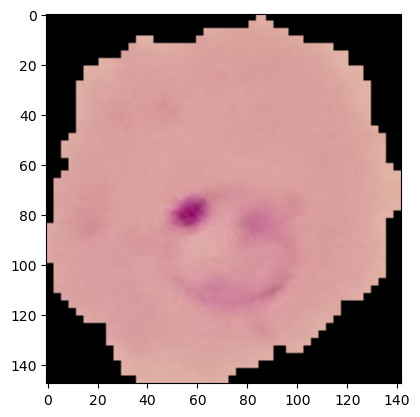

In [14]:
plt.imshow(imread(para_cell))

In [15]:
os.listdir(train_path+'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [16]:
uninfect_cell = train_path+'uninfected//'+ 'C100P61ThinF_IMG_20150918_144104_cell_128.png'

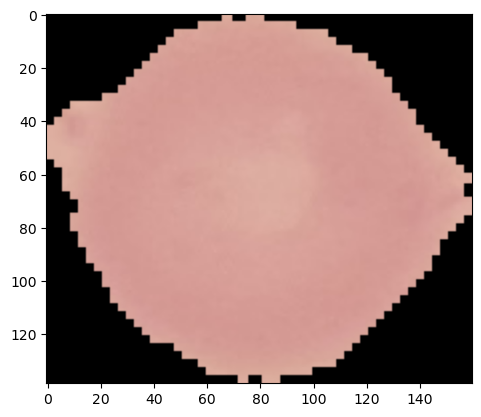

In [17]:
plt.imshow(imread(uninfect_cell))

In [18]:
len(os.listdir(train_path+'parasitized'))

12480

In [19]:
len(os.listdir(train_path+'uninfected'))

12480

In [20]:
len(os.listdir(test_path+'parasitized'))

1300

In [21]:
len(os.listdir(test_path+'uninfected'))

1300

# Preparing Data

In [22]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'uninfected'):
    img = imread(test_path+'uninfected\\'+image_filename)
    d1,d2,color = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [23]:
dim1

[118,
 172,
 130,
 163,
 172,
 139,
 151,
 160,
 145,
 127,
 121,
 154,
 145,
 127,
 154,
 151,
 148,
 130,
 160,
 136,
 139,
 190,
 127,
 133,
 136,
 124,
 151,
 151,
 151,
 160,
 118,
 154,
 154,
 121,
 127,
 118,
 130,
 124,
 163,
 88,
 139,
 127,
 121,
 139,
 166,
 133,
 124,
 154,
 139,
 127,
 124,
 136,
 166,
 133,
 145,
 157,
 181,
 148,
 112,
 124,
 112,
 106,
 121,
 148,
 148,
 112,
 121,
 148,
 97,
 112,
 142,
 118,
 130,
 151,
 133,
 136,
 115,
 145,
 115,
 142,
 136,
 130,
 142,
 124,
 142,
 136,
 166,
 148,
 136,
 142,
 133,
 130,
 139,
 124,
 139,
 121,
 130,
 142,
 133,
 118,
 157,
 127,
 109,
 112,
 139,
 142,
 142,
 112,
 118,
 100,
 127,
 145,
 136,
 160,
 187,
 130,
 130,
 157,
 130,
 130,
 151,
 175,
 145,
 136,
 157,
 133,
 127,
 154,
 133,
 151,
 130,
 136,
 160,
 130,
 139,
 145,
 145,
 145,
 154,
 133,
 160,
 142,
 157,
 145,
 136,
 121,
 115,
 121,
 121,
 127,
 145,
 130,
 133,
 142,
 127,
 121,
 139,
 118,
 118,
 148,
 121,
 145,
 130,
 169,
 142,
 136,
 148,


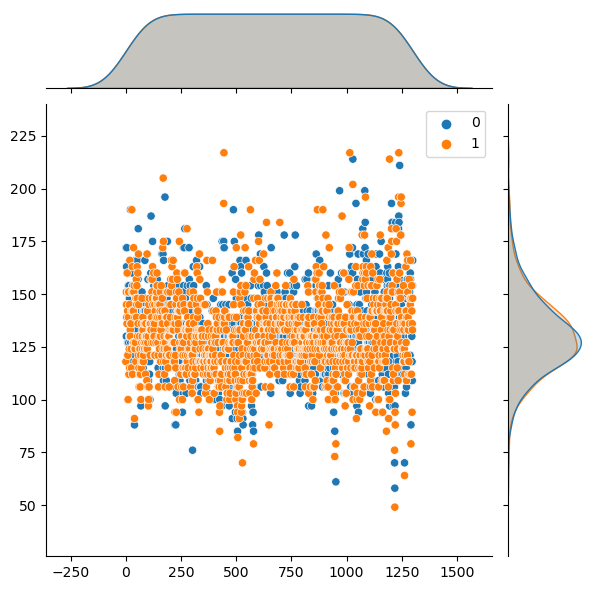

In [24]:
sns.jointplot((dim1,dim2))

In [25]:
np.mean(dim1)

130.92538461538462

In [26]:
np.mean(dim2)

130.75

In [27]:
image_shape = (130,130,3)

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
# help(ImageDataGenerator)

In [30]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

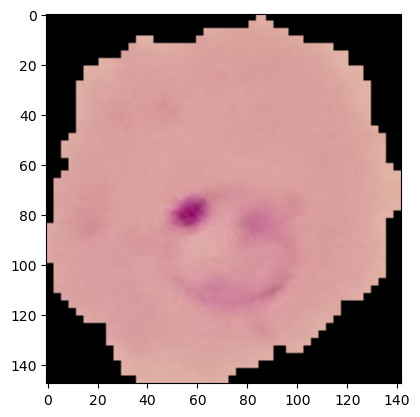

In [31]:
para_img = imread(para_cell)
plt.imshow(para_img)

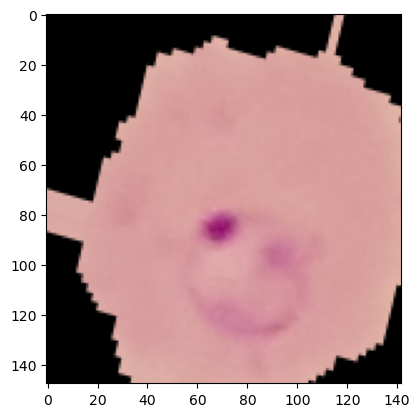

In [32]:
plt.imshow(image_gen.random_transform(para_img))

In [33]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [34]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


# Creating Model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [36]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [40]:
batch_size = 16

In [41]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 24958 images belonging to 2 classes.


In [42]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                shuffle=False)

Found 2600 images belonging to 2 classes.


In [43]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [44]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [45]:
# results = model.fit(train_image_gen,epochs=20,
#                     validation_data=test_image_gen,
#                     callbacks=[early_stop])

*Taking a long time, therefore loading presaved model*

In [46]:
from tensorflow.keras.models import load_model

In [47]:
data_dir

'f:\\Learning\\TF_2_Notebooks_and_Data\\DATA\\cell_images'

In [48]:
model_file = 'f:\\Learning\\TF_2_Notebooks_and_Data\\04-CNNs\\malaria_detector.h5'

In [49]:
model = load_model(model_file)

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

# Model Evaluation

In [51]:
model.evaluate(test_image_gen)

163/163 [==============================] - 53s 322ms/step - loss: 38.4260 - accuracy: 0.8712


[38.426025390625, 0.8711538314819336]

In [52]:
model.metrics_names

['loss', 'accuracy']

In [53]:
pred = model.predict(test_image_gen)

163/163 [==============================] - 47s 280ms/step


In [56]:
predictions = pred>0.5

In [57]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [61]:
len(predictions)

2600

In [58]:
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88      1300
           1       0.97      0.77      0.86      1300

    accuracy                           0.87      2600
   macro avg       0.89      0.87      0.87      2600
weighted avg       0.89      0.87      0.87      2600



In [63]:
cm = confusion_matrix(test_image_gen.classes,predictions)
cm

array([[1268,   32],
       [ 298, 1002]], dtype=int64)

<Axes: >

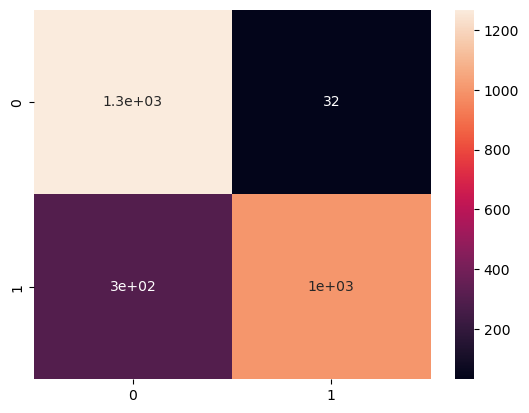

In [64]:
sns.heatmap(cm,annot=True)

In [65]:
from tensorflow.keras.preprocessing import image

In [67]:
my_img = image.load_img(para_cell,target_size=image_shape)

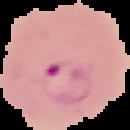

In [68]:
my_img

In [69]:
my_img_array = image.img_to_array(my_img)

In [71]:
my_img_array.shape

(130, 130, 3)

In [72]:
my_img_array = np.expand_dims(my_img_array,axis=0)

In [73]:
my_img_array.shape

(1, 130, 130, 3)

In [74]:
model.predict(my_img_array)

1/1 [==============================] - 1s 785ms/step


array([[0.]], dtype=float32)

In [75]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

*Correct prediction*